In [1]:
from cascading_defaults.simulation.simulation import Simulation
from cascading_defaults.simulation.strategies import available_strategies, LargestCreditorFirst, LargestCreditorLast, EisenbergNoe
from cascading_defaults.analysis.simulation_analysis import flow_over_time, show_results, show_reserves_distribution_at_maturity, show_degrees, show_strengths, show_ratios_payments
from cascading_defaults.utils import select_simulations
from cascading_defaults import plt

In [2]:
import os
label_of_network='random_network'

from scipy import sparse
path = os.path.join(os.getcwd(), 'transactionnetworks/', label_of_network, 'L.npz')
L = sparse.load_npz(path)


In [3]:
# Simulation parameters
max_iter = 100
save = True
verbose = 0
rtol = 5e-5

In [4]:
from itertools import product

build_reserves_list = [True]
pay_remaining_money_list = [False, True]
has_exogenous_list = [False]
strategy_classes = available_strategies

strategies = []

for has_exogenous, strategy_class, build_reserves, pay_remaining_money in product(has_exogenous_list, strategy_classes, build_reserves_list, pay_remaining_money_list):
    if strategy_class == EisenbergNoe and not pay_remaining_money:
        print(f'Skipping EisenbergNoe with pay_remaining_money=False.')
        continue
    strategy = strategy_class(build_reserves=build_reserves, pay_remaining_money=pay_remaining_money, has_exogenous=has_exogenous)
    strategies.append(strategy)
    
simulations = {}

for strategy in strategies:
    simulation = Simulation(strategy, L, label_of_run=f'{max_iter}_run', start_reserves=0, label_of_network=label_of_network)
    simulations[strategy.label] = simulation

Skipping EisenbergNoe with pay_remaining_money=False.
Setting up Simulation for LargestCreditorFirstR-NoExo_100_run.
Loading L_sorted_descending from ~/transactionnetworks/random_network/L_sorted_descending.npz.
Setting up Simulation for LargestCreditorFirstXR-NoExo_100_run.
Loading L_sorted_descending from ~/transactionnetworks/random_network/L_sorted_descending.npz.
Setting up Simulation for LargestCreditorLastR-NoExo_100_run.
Loading L_sorted_ascending from ~/transactionnetworks/random_network/L_sorted_ascending.npz.
Setting up Simulation for LargestCreditorLastXR-NoExo_100_run.
Loading L_sorted_ascending from ~/transactionnetworks/random_network/L_sorted_ascending.npz.
Setting up Simulation for EisenbergNoeXR-NoExo_100_run.
Loading L_EisenbergNoe from ~/transactionnetworks/random_network/L_EisenbergNoe.npz.


In [5]:
for simulation in simulations.values():
    simulation.load()

Loading from ~/simulations/random_network/100_run/LargestCreditorFirstR-NoExo/
Loading from ~/simulations/random_network/100_run/LargestCreditorFirstXR-NoExo/
Loading from ~/simulations/random_network/100_run/LargestCreditorLastR-NoExo/
Loading from ~/simulations/random_network/100_run/LargestCreditorLastXR-NoExo/
Loading from ~/simulations/random_network/100_run/EisenbergNoeXR-NoExo/


In [6]:
build_reserves_list = [True]
pay_remaining_money_list = [False, True]
has_exogenous_list = [False]
strategy_classes = available_strategies # Or a list like [LargestCreditorFirst] (no quotation marks)

selection = (strategy_classes, build_reserves_list, pay_remaining_money_list, has_exogenous_list)

In [7]:
selected_simulations = select_simulations(simulations, selection)

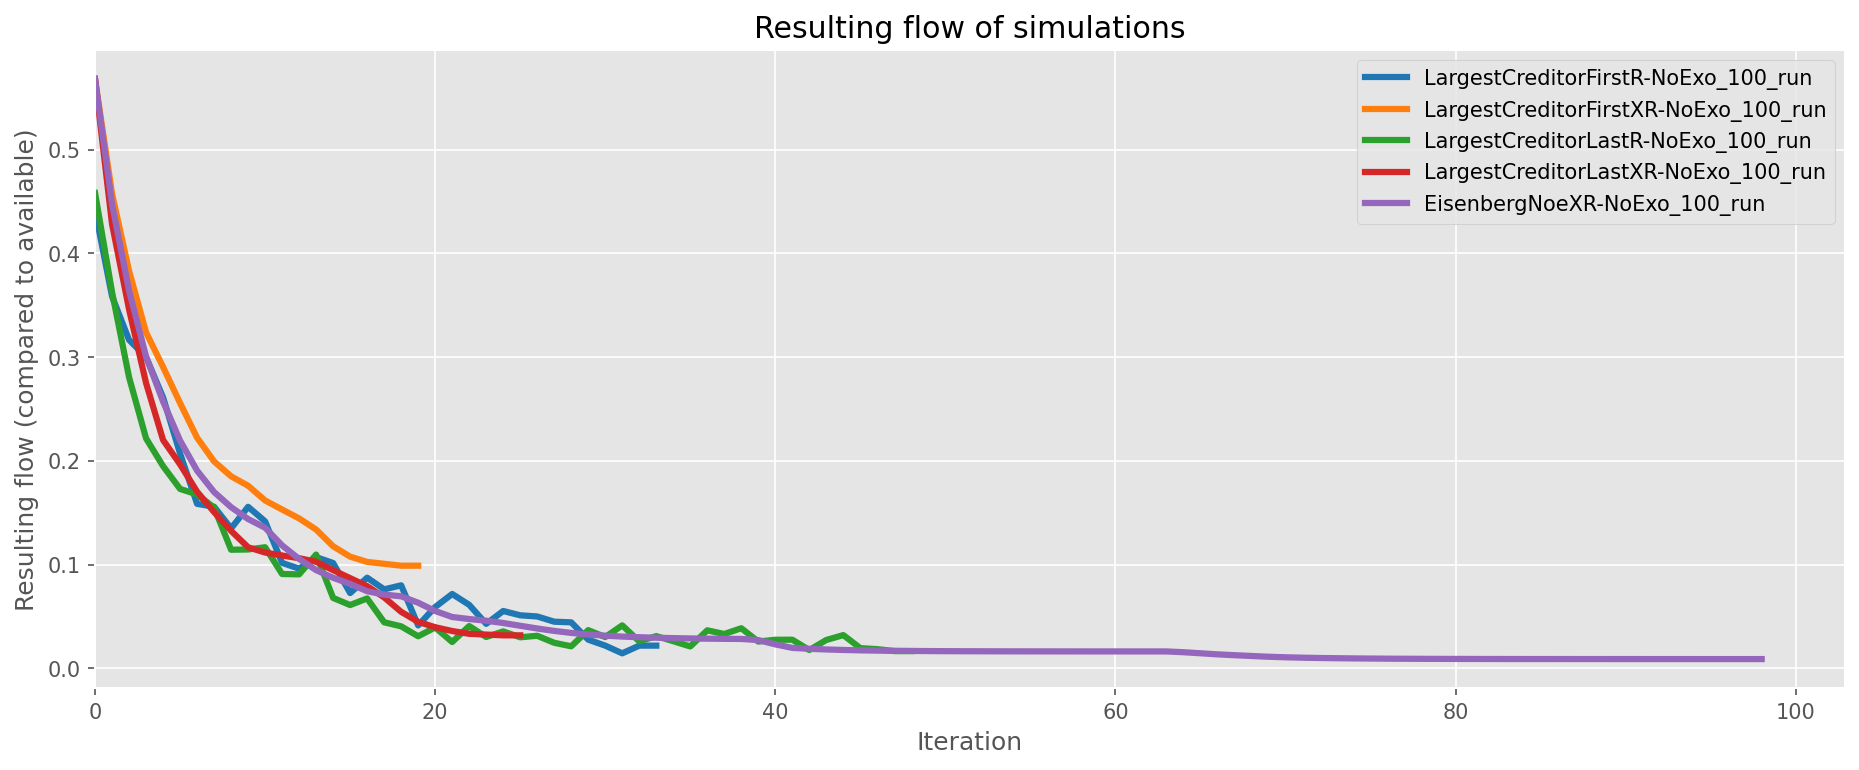

In [8]:
flow_over_time(simulations, absolute_relative='relative', linestyle_exo='-')

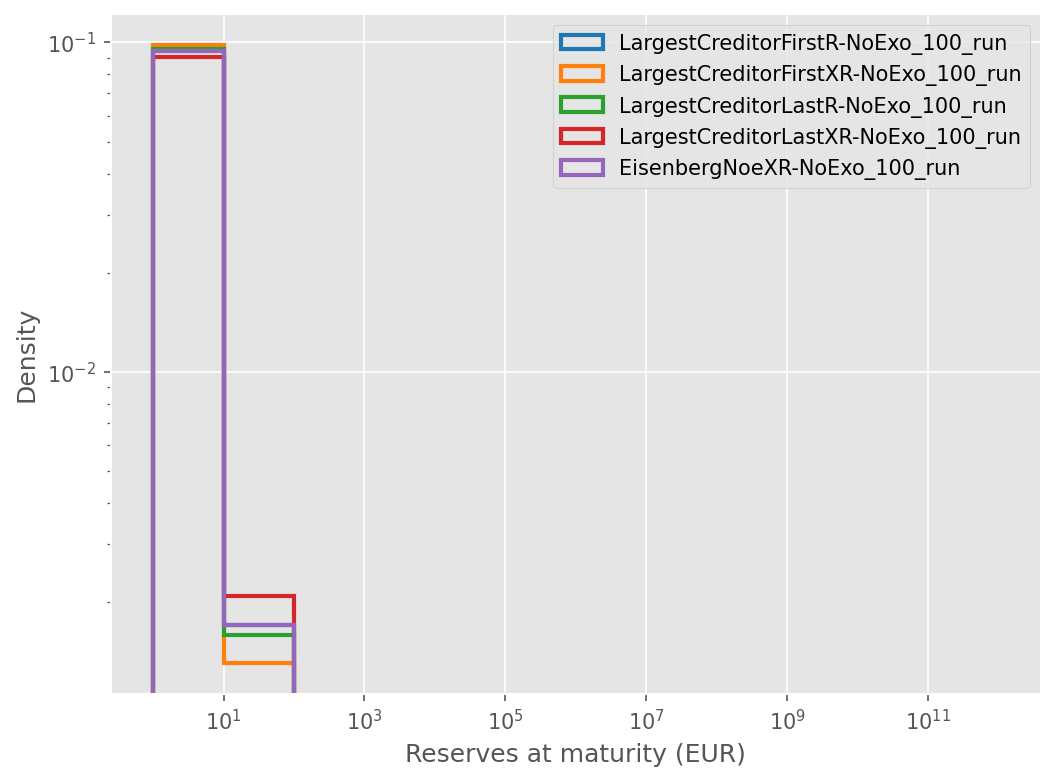

In [9]:
show_reserves_distribution_at_maturity(simulations)

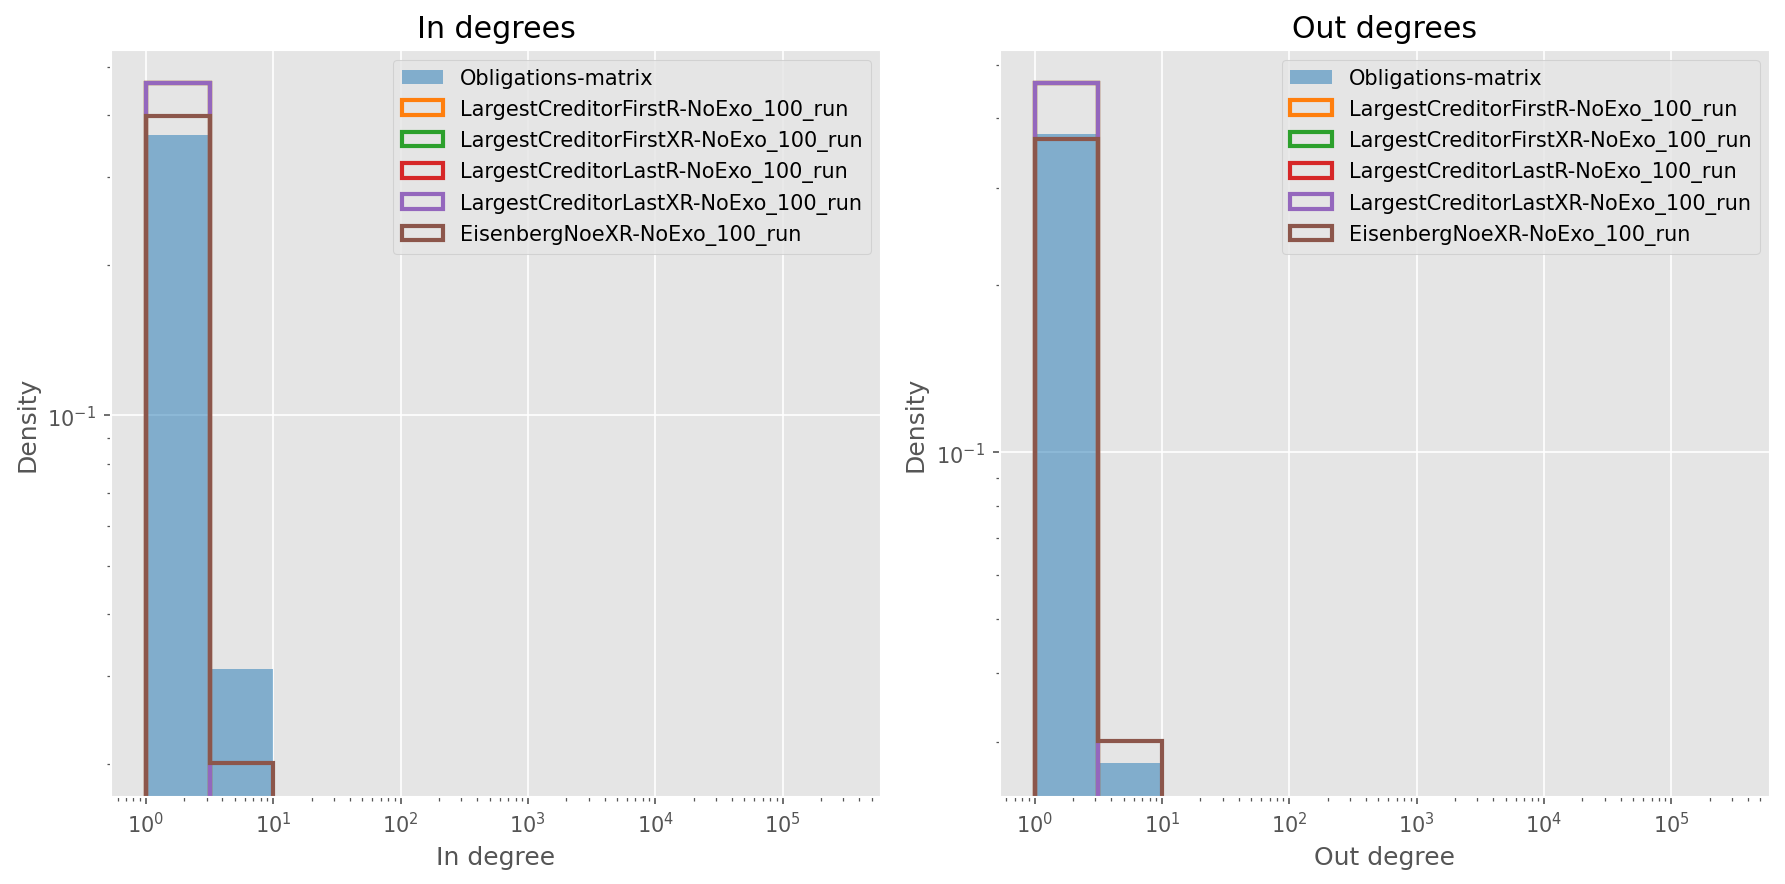

In [10]:
show_degrees(simulations)

/Users/camilledevalk/Code/cascading-defaults/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/camilledevalk/Code/cascading-defaults/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/camilledevalk/Code/cascading-defaults/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/camilledevalk/Code/cascading-defaults/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/camilledevalk/Code/cascading-defaults/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/camilled

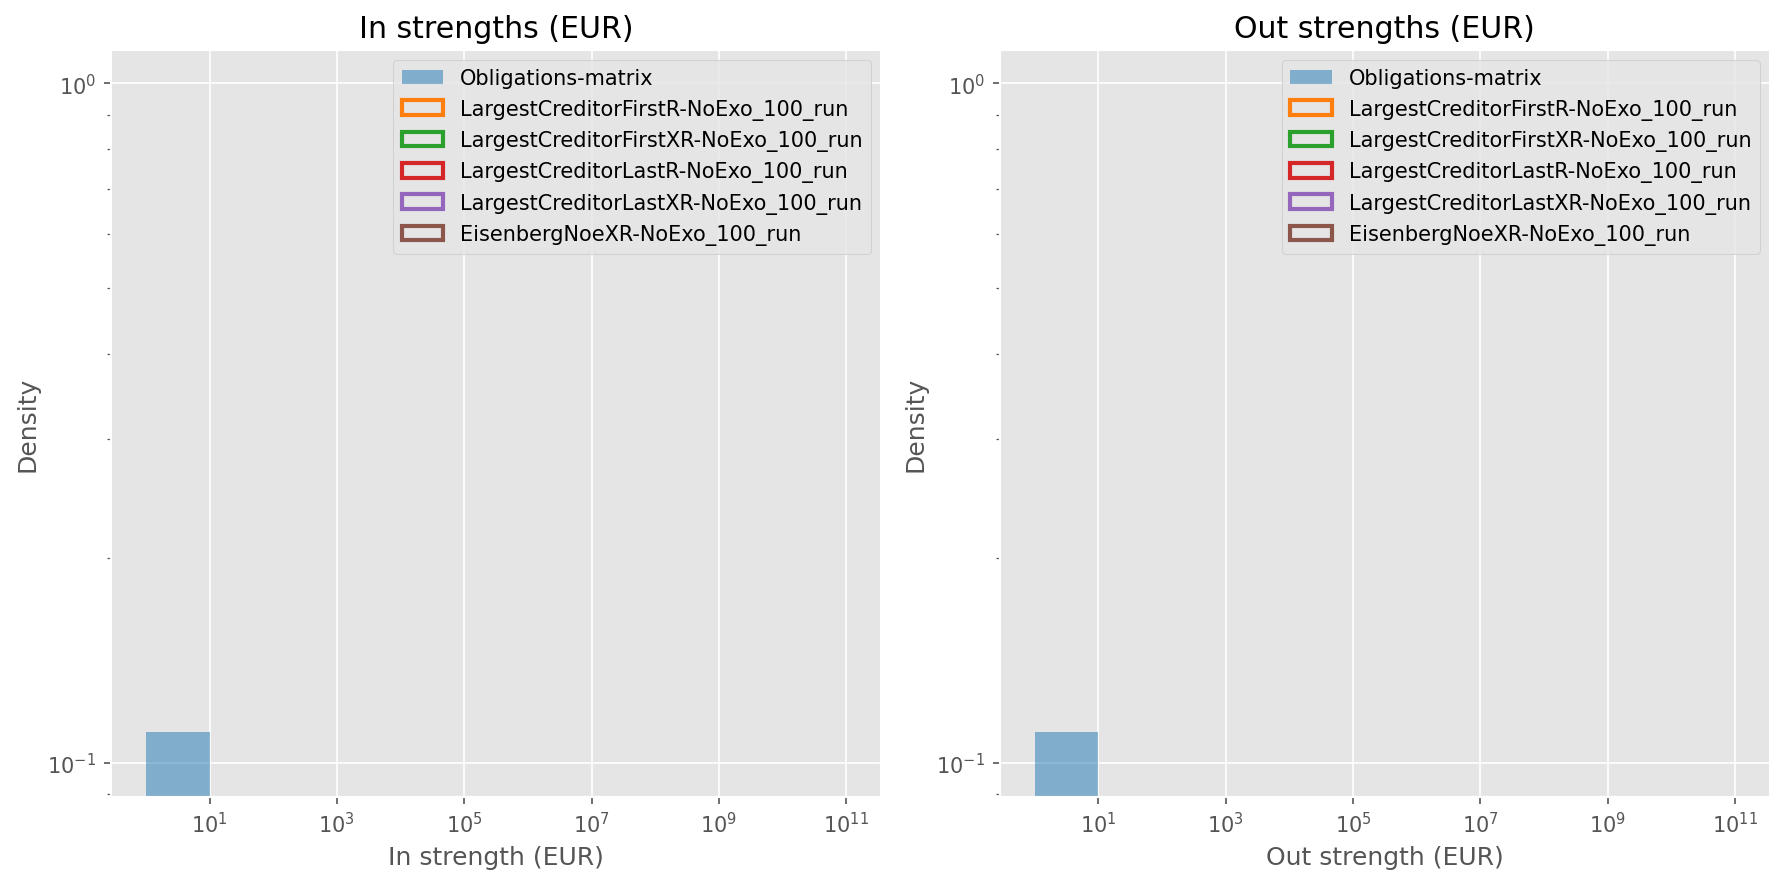

In [11]:
show_strengths(simulations)

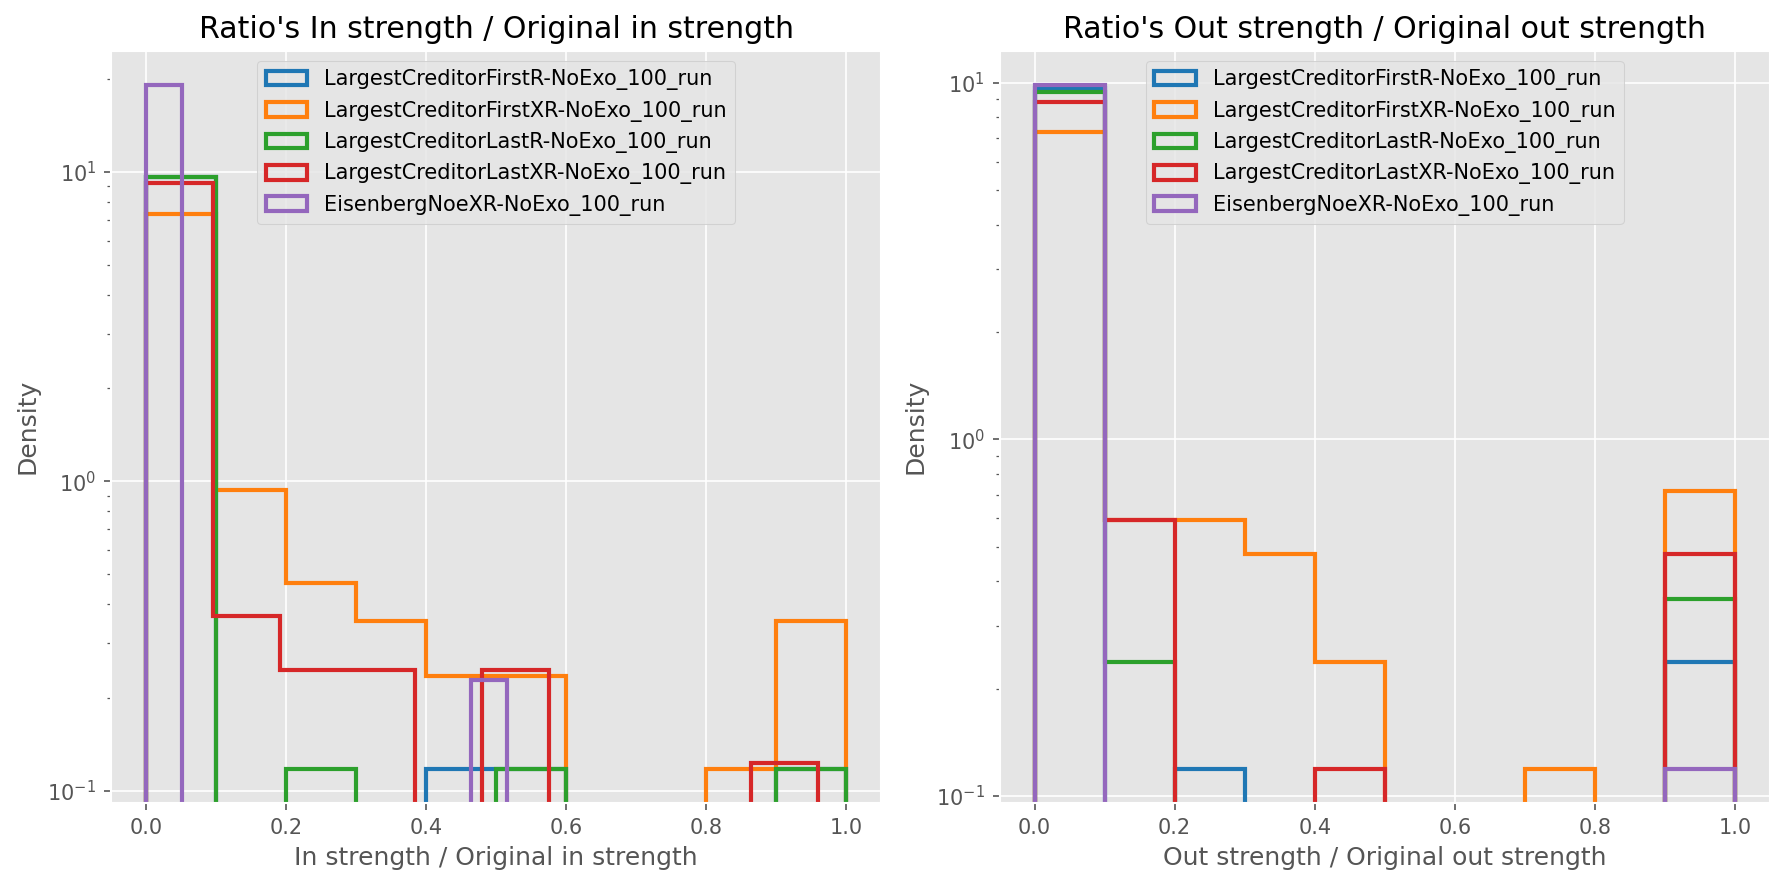

In [12]:
show_ratios_payments(simulations)